<a href="https://colab.research.google.com/github/leohas/ai-project/blob/master/An%C3%A1lise_de_Sentimento_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import pprint as pp
from joblib import dump

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# The Data


>The Multi-Domain Sentiment Dataset contains product reviews taken from Amazon.com from many product types (domains). Some domains (books and dvds) have hundreds of thousands of reviews. Others (musical instruments) have only a few hundred. Reviews contain star ratings (1 to 5 stars) that can be converted into binary labels if needed. This page contains some descriptions about the data. If you have questions, please email Mark Dredze or John Blitzer. 

http://www.cs.jhu.edu/~mdredze/datasets/sentiment/

In [3]:
csv_file = '../content/gdrive/My Drive/johnny-depp-trial-tweets.csv'
df = pd.read_csv(csv_file)

In [9]:
# print(df)
df['tweet'] = df['tweet'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               10004 non-null  int64   
 1   conversation_id  10004 non-null  int64   
 2   created_at       10004 non-null  object  
 3   date             10004 non-null  object  
 4   time             10004 non-null  object  
 5   timezone         10004 non-null  int64   
 6   user_id          10004 non-null  int64   
 7   username         10004 non-null  object  
 8   name             10004 non-null  object  
 9   place            12 non-null     object  
 10  tweet            10004 non-null  category
 11  language         10004 non-null  object  
 12  mentions         10004 non-null  object  
 13  urls             10004 non-null  object  
 14  photos           10004 non-null  object  
 15  replies_count    10004 non-null  int64   
 16  retweets_count   10004 non-null  int64  

In [11]:
df.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1536417583959769088,1536417583959769088,2022-06-13 18:37:51 UTC,2022-06-13,18:37:51,0,806615222719041539,twiggywitch,༒Justice For Johnny Depp༒,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1536417574652723201,1536417574652723201,2022-06-13 18:37:49 UTC,2022-06-13,18:37:49,0,930545526797426690,a_haber_,Aᴋᴛüᴇʟ Hᴀʙᴇʀ,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1536417541597315073,1536412895914885120,2022-06-13 18:37:41 UTC,2022-06-13,18:37:41,0,1526717067784773635,waqery123,Rayer Rrt,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DamilolaOlani12', 'name': 'k...",NaN,NaN,NaN,NaN
3,1536417482029813760,1535647733977169920,2022-06-13 18:37:27 UTC,2022-06-13,18:37:27,0,789235355866259456,melissaortega16,🖕🏾,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'missvxolence', 'name': 'sers...",NaN,NaN,NaN,NaN
4,1536417353021415426,1536417353021415426,2022-06-13 18:36:56 UTC,2022-06-13,18:36:56,0,1373804899704700931,fangirldoloki,Michelle 👅✨,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,1536417209152675842,1536417209152675842,2022-06-13 18:36:22 UTC,2022-06-13,18:36:22,0,1158530175807758338,michelekellie,Kellie Michele,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1536417146187788296,1536417146187788296,2022-06-13 18:36:07 UTC,2022-06-13,18:36:07,0,878018761432977409,smithblindlib5,Blindguy Resists!,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,1536417104282492929,1536417104282492929,2022-06-13 18:35:57 UTC,2022-06-13,18:35:57,0,1534292608972996608,dilfbateman,marce,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,1536416923113639942,1536416923113639942,2022-06-13 18:35:14 UTC,2022-06-13,18:35:14,0,1456016450150440960,tvfilmmusicnews,TV Film Music News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1536416921402343425,1536416921402343425,2022-06-13 18:35:13 UTC,2022-06-13,18:35:13,0,2842069054,telefetucuman,Telefe Tucumán,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [18]:
sample = df.sample(1)
print('-'*100)
print('Tweet: %s' % sample['tweet'].values[0])

----------------------------------------------------------------------------------------------------
Tweet: ¿Estoy mal si Amber Heard me encanta físicamente?, porque de forma presencial no tengo el gusto. Se me hace una mujer increíblemente atractiva, y eso que las güeras no me atraen; de piel blanca sí, pero las güerejas no me gustan.  Ya hablé con Johnny Depp para que no le cobre.  https://t.co/Ernc7pxuby


# Preprocessing Text data

In [25]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [26]:
MAX_NUM_FEATURES = 20000
NGRAN_RANGE = 1
MAX_SEQUENCE_LENGTH = 400
VALIDATION_SPLIT = .1

In [28]:
from keras.preprocessing import text
texts = df['tweet'].astype(str)
labels = df['id'].astype('int32')

tokenizer = text.Tokenizer(num_words=MAX_NUM_FEATURES)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 29431 unique tokens.


In [29]:
print(texts[4164])
pp.pprint(sequences[4164], width=200, compact=True)

@mldauber @BillPressPod …person! He had much better lawyers, better witness testimony and here’s the real kicker Johnny actually told the truth. The only one to set women back in the me too movement is Amber Heard but most SANE people get that.
[467, 1285, 17388, 31, 105, 271, 408, 202, 408, 642, 374, 10, 1907, 5, 224, 17389, 1, 324, 333, 5, 155, 5, 130, 79, 9, 382, 148, 165, 14, 5, 69, 171, 315, 13, 2, 3, 32, 356, 2686, 70, 120, 20]


In [30]:
print(len(sequences), 'sequences')
print('Average train sequence length: %d' % np.mean(list(map(len, sequences))))

10004 sequences
Average train sequence length: 29


In [31]:
def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.
    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}
    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.
    Example: adding bi-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]
    Example: adding tri-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

In [32]:
len(sequences)

10004

In [33]:
if NGRAN_RANGE > 1:
    ngram_set = set()
    for input_list in sequences:
        for i in range(2, NGRAN_RANGE + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)
    
    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.        
    token_indice = {v: k + MAX_NUM_FEATURES for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}
    
    # Update MAX_NUM_FEATURES
    MAX_NUM_FEATURES = np.max(list(indice_token.keys())) + 1
    print('Update MAX_NUM_FEATURES %d' % MAX_NUM_FEATURES)
    
    # Augument sequences with the new features
    sequences = add_ngram(sequences, token_indice, NGRAN_RANGE)
    print(len(sequences), 'sequences')
    print('Average train sequence length: %d' % np.mean(list(map(len, sequences))))

In [34]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [35]:
pp.pprint(data[0].tolist(), width=200, compact=True)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0

In [36]:
# Split the date into train and validation sets
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

X_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
X_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [37]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape, 'type', y_train.dtype)
print('y_val shape:', y_val.shape, 'type', y_val.dtype)

X_train shape: (9004, 400)
X_val shape: (1000, 400)
y_train shape: (9004,) type int32
y_val shape: (1000,) type int32


# Fasttext Model

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from keras.callbacks import ModelCheckpoint

In [39]:
def fasttext_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_NUM_FEATURES,
                        output_dim=100,
                        input_length=MAX_SEQUENCE_LENGTH))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [40]:
model = fasttext_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 100)          2000000   
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,000,101
Trainable params: 2,000,101
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
%%time

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
71/71 [==============================] - 4s 43ms/step - loss: 622484.2500 - accuracy: 0.0000e+00 - val_loss: -401972.3438 - val_accuracy: 0.0000e+00
Epoch 2/20
71/71 [==============================] - 3s 49ms/step - loss: -979756.3750 - accuracy: 0.0000e+00 - val_loss: -235905.3281 - val_accuracy: 0.0000e+00
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: -2616254.0000 - accuracy: 0.0000e+00 - val_loss: -208914.3438 - val_accuracy: 0.0000e+00
Epoch 4/20
71/71 [==============================] - 3s 39ms/step - loss: -4091268.0000 - accuracy: 0.0000e+00 - val_loss: -599124.1875 - val_accuracy: 0.0000e+00
Epoch 5/20
71/71 [==============================] - 3s 44ms/step - loss: -6992905.0000 - accuracy: 0.0000e+00 - val_loss: 1090597.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
71/71 [==============================] - 3s 38ms/step - loss: -9927097.0000 - accuracy: 0.0000e+00 - val_loss: 3126548.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
71/71 [=============

In [48]:
def plot_results(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

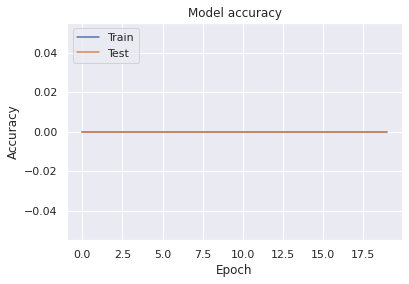

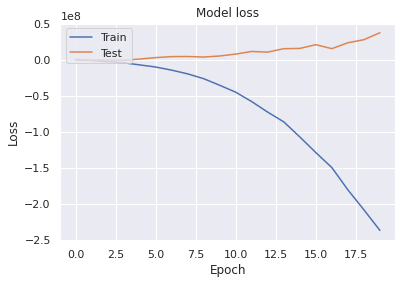

In [49]:
plot_results(history)